# Equações utilizadas:
$$\tau_m \frac{dV}{dt} = -(V-V_r) + \Delta_L exp(\frac{V-V_L}{\Delta_L}) - Ru + RI$$
$$\tau_u \frac{du}{dt} = a(V-V_r) - u$$

In [84]:
from numpy import arange, zeros, exp
import matplotlib.pyplot as plt

In [85]:
#  parametros fixos
V_r = -0.07    #V
R = 500e6  #Ohm
delta_L = 0.002  #V
V_L = -0.05   #V
V_pico = 0.02  #V

dt = 1e-6   #s
tmax = 0.3    #s

V0 = V_L
u0 = 0

I_inj = 65e-12 #A

# numero de interacoes
N = round(tmax / dt)

# parametros dos diferentes padroes de disparo
lista_parametros = [(20e-3, 0, 30e-3, 60e-12, -55e-3), (20e-3, 0, 100e-3, 5e-12, -55e-3), (5e-3, 0.5e-9, 100e-3, 7e-12, -51e-3), (5e-3, -0.5e-9, 100e-3, 7e-12, -46e-3), (9.9e-3, -0.5e-9, 100e-3, 7e-12, -46e-3), (10e-3, 1e-9, 100e-3, 10e-12, -60e-3), (5e-3, -1e-9, 100e-3, 10e-12, -60e-3)]

# estilo do grafico
plt.style.use('bmh')

In [86]:
def corrente(I, t):
    return  I*(t>=0)


def dVdt(V, u, I, tau_m):
    return ( (V_r - V) + delta_L * exp( (V-V_L)/delta_L ) - R*u + R*I ) / tau_m


def dudt(V, u, I, a, tau_u):
    return ( a * (V - V_r) - u ) / tau_u


def euler(I, parametros):
    tau_m = parametros[0]
    a = parametros[1]
    tau_u = parametros[2]
    b = parametros[3]
    V_redef = parametros[4]

    V = zeros(N)
    u = zeros(N)

    V[0] = V0
    u[0] = u0

    for i in range(N-1):
        if V[i] > V_pico:
            u[i] = u[i] + b
            V[i] = V_redef

        u[i+1] = u[i] + dt * dudt(V[i], u[i], I[i], a, tau_u)
        V[i+1] = V[i] + dt * dVdt(V[i], u[i], I[i], tau_m)

    return V


def graficoPadroesDisparos(I,lista_parametros):
    modelos = ['Tonic', 'Adapting', 'Init. burst', 'Bursting', 'Irregular', 'Transient']

    j, k = 0, 2

    while k <= 6:
        for i in range(j, k):
            parametros = lista_parametros[i]
            V = euler(I, parametros)

            plt.subplot(3,2,i+1)
            plt.plot(t, V*1e3, 'k', label=modelos[i])
            plt.legend()
            if (i+1) % 2 != 0:
                plt.ylabel(r'$V\;(mV)$')
            plt.xlabel(r'$t\;(s)$')

        j += 2
        k += 2

    plt.show()

    I_inj = 25e-12
    I = corrente(I_inj, t)

    V = euler(I, lista_parametros[6])

    plt.figure(figsize=(4,3))
    plt.plot(t, V*1e3, 'k', label='Delayed')
    plt.legend()

    plt.ylabel(r'$V\;(mV)$')
    plt.xlabel(r'$t\;(s)$')

    plt.show()

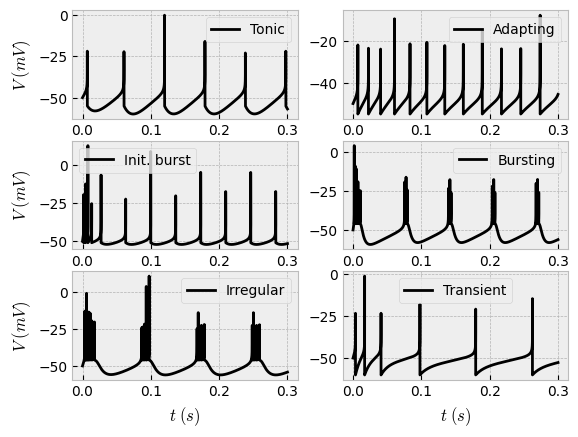

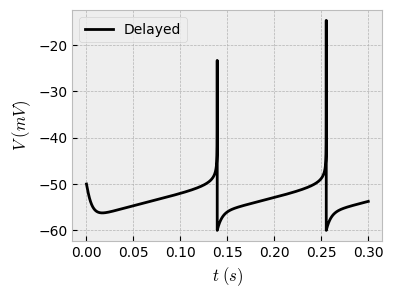

In [87]:
t = arange(0, tmax, dt)
I = corrente(I_inj, t)

graficoPadroesDisparos(I, lista_parametros)